<a href="https://colab.research.google.com/github/lucas-azdias/Scripts-Universidade/blob/main/Python/Aprendizagem%20de%20M%C3%A1quina/01/Introdu%C3%A7%C3%A3o%20Scikit/Introdu%C3%A7%C3%A3o%20Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

O Scikit-Learn é uma biblioteca Python que implementa diversos algoritmos de aprendizado de máquina. Sua API é limpa e padronizada, com uma documentação online completa. A padronização permite que, uma vez aprendida a sintaxe para um modelo, mudar para outro é fácil. Este notebook apresenta o primeiro contato com Scikit-Learn, abordando a representação de dados, modelos e um exemplo prático de uso para explorar imagens de dígitos escritos à mão.

## Representação de dados no Scikit-Learn

A aprendizagem de máquina trata da criação de modelos a partir de dados: por esse motivo, começaremos discutindo como os dados podem ser representados para serem compreendidos pelo computador. A melhor maneira de pensar sobre dados no Scikit-Learn é em termos de tabelas de dados.

###Dados como tabela

Uma tabela básica é uma grade bidimensional de dados, na qual as linhas representam as amostras individuais do conjunto de dados e as colunas representam as características relacionadas a cada um dessas amostras. Por exemplo, considere o conjunto de dados Íris, referente a atributos deste gêneto de plantas, analisado por Ronald Fisher em 1936. Podemos baixar esse conjunto de dados na forma de um DataFrame do Pandas usando a biblioteca seaborn:

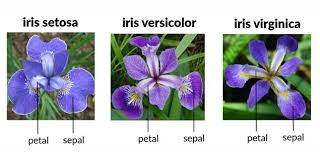

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

#biblioteca para manipulação de dados estruturados
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Remover '(cm)' dos nomes das features
df.columns = [col.replace(' (cm)', '') for col in df.columns]

# Adicionar a coluna de classes
df['species'] = data.target

class_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(class_names)

df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# mapear a coluna de classes com nomes

# Embaralhar o DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

In [ ]:
df.info()


In [ ]:
df.describe()


Aqui, cada linha dos dados se refere a uma única flor observada, e o número de linhas é o número total de flores no conjunto de dados. (n_samples)

Da mesma forma, cada coluna dos dados se refere a uma peça quantitativa específica de informação que descreve cada amostra. Em geral, nos referiremos às colunas da matriz como características e ao número de colunas como n_features.

#### Rótulo (Classe)

Por exemplo, nos dados anteriores, podemos desejar construir um modelo que possa prever a espécie da flor com base em outras medições; nesse caso, a coluna de espécies seria considerada como a classe.

Com isso em mente, podemos visualizar os dados separados por classe e características para analisar a distribuição.

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()

plt.figure(figsize=(10, 6))

sns.pairplot(df, hue='species', size=1.5);
plt.show()

Para treinarmos um modelo utilizando a matriz, necessitamos seperar o vetor de característica (x) e o seu rótulo (y)

In [ ]:
X_iris = df.drop('species', axis=1)
X_iris = X_iris.to_numpy()
print(X_iris.shape)
print(X_iris[0])


In [ ]:
y_iris = df['species']
y_iris.shape
y_iris[0]

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

In [ ]:
print(X_iris[0], y_iris[0])

#Aprendizado Supervisionado: Classificação Base Iris


#Preparação dos dados

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#0 -> Setosa, 1 -> Versicolor, 2 -> Verginica

### Digitos Manuscritos



In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape



In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
X = digits.data
y = digits.target
y.shape
print(X.shape, y.shape)

#Data preparation (Holdout)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')